## Load & scale data

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.cluster import  KMeans

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
df = pd.read_csv("Mall_Customers.csv")

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.columns = ['CustomerID','Gender','Age','AnnualIncome','SpendingScore']

In [11]:
X = df[['AnnualIncome','SpendingScore']]

In [12]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

## Elbow Method

Text(0.5, 1.0, 'Elbow Method for Optimal k')

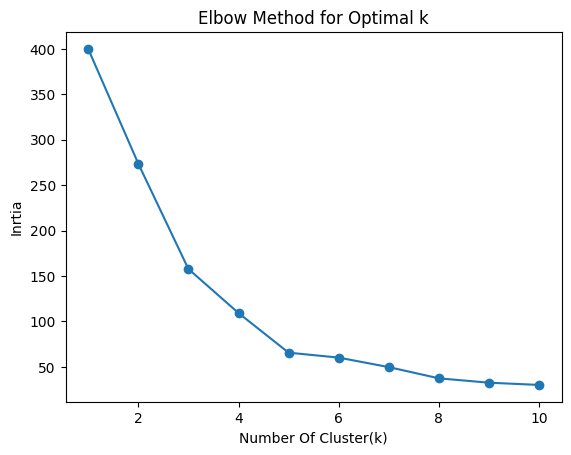

In [13]:
k_values = range(1,11)
inertia =[]

for k in k_values:
    kmenas = KMeans(n_clusters=k,random_state=42)
    kmenas.fit(X_scaler)
    inertia.append(kmenas.inertia_)


plt.figure()
plt.plot(k_values,inertia,marker = 'o')
plt.xlabel('Number Of Cluster(k)')
plt.ylabel('Inrtia')
plt.title('Elbow Method for Optimal k')

## Silhouette Score

In [14]:
for k in range(2,11):
    kmenas = KMeans(n_clusters=k,random_state=42)
    labels = kmenas.fit_predict(X_scaler)
    score = silhouette_score(X_scaler,labels)
    print(f"k = {k},Silhouette Score = {score:.3f}")

k = 2,Silhouette Score = 0.397
k = 3,Silhouette Score = 0.467
k = 4,Silhouette Score = 0.494
k = 5,Silhouette Score = 0.555
k = 6,Silhouette Score = 0.514
k = 7,Silhouette Score = 0.502
k = 8,Silhouette Score = 0.455
k = 9,Silhouette Score = 0.457
k = 10,Silhouette Score = 0.445


## Final K-Means Model

In [15]:
kmenas = KMeans(n_clusters=5,random_state=42)
labels = kmenas.fit_predict(X_scaler)


df['Cluster'] = labels
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Plot Clusters with Centroids

Text(0.5, 1.0, 'K-Means Clusters with Centroids')

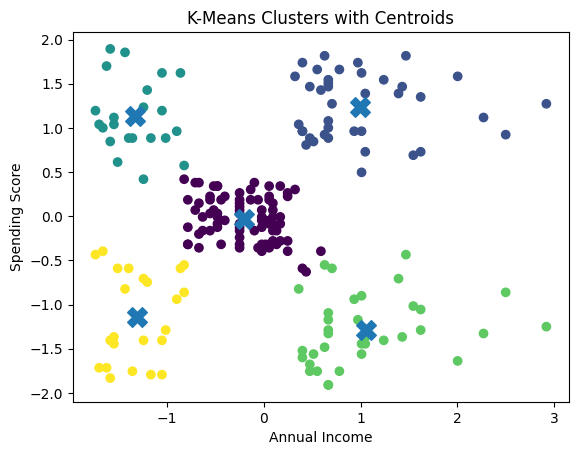

In [16]:
plt.figure()
plt.scatter(X_scaler[:,0],X_scaler[:,1],c =labels)
center = kmenas.cluster_centers_
plt.scatter(center[:,0],center[:,1],marker='X',s= 200)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clusters with Centroids')

### If k is decreased, clusters become larger and more generalized, which can mix different types of customers into the same cluster and reduce interpretability.
### If k is increased, clusters become smaller and more specific, which can lead to over-segmentation where clusters may capture noise instead of meaningful structure.

### The trade-off is between simplicity and detail. A smaller k gives simpler, more general clusters but may hide important differences. A larger k gives more detailed segmentation but increases model complexity and the risk of overfitting or creating clusters that are not meaningful for business decisions.

## Cluster Visualization & Geometry

Text(0.5, 1.0, 'K-Means Clusters: Income vs Spending with Centroids')

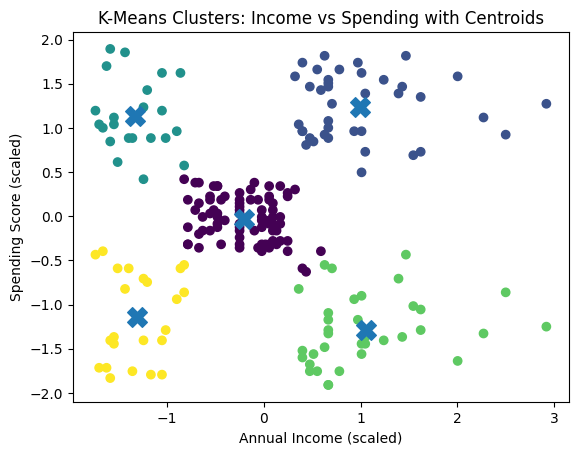

In [17]:
plt.figure()
plt.scatter(X_scaler[:,0],X_scaler[:,1],c=df['Cluster'])
center = kmenas.cluster_centers_
plt.scatter(center[:,0],center[:,1],marker='X',s=200)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('K-Means Clusters: Income vs Spending with Centroids')

### The Income vs Spending visualization shows how clusters are positioned relative to each other in the feature space. We can clearly see that K-Means forms groups based on distance, with each cluster centered around its centroid. This helps us visually verify that customers within the same cluster are close to each other and different clusters are reasonably separated. It also reveals whether clusters overlap or are well separated, which cannot be fully understood from metrics like inertia or silhouette score alone.

## Visualization: PCA (2D Projection)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
X_pca_features = df[['Age','AnnualIncome','SpendingScore']]

In [21]:
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca_features)

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_scaled)

Text(0.5, 1.0, 'PCA Projection of Customer Clusters')

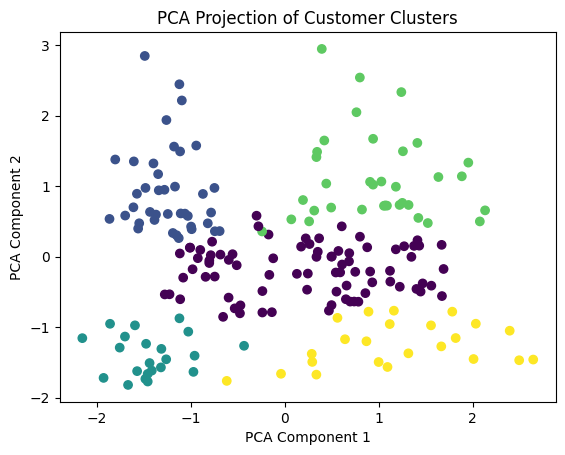

In [23]:
plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1],c = df['Cluster'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of Customer Clusters')

### The PCA plot projects the multi-dimensional data into two dimensions while preserving as much variance as possible. This allows us to see the overall geometric structure of the clusters. Even when using more than two features (Age, Income, Spending), PCA helps visualize whether clusters are compact, overlapping, or clearly separated. This visualization reveals cluster shape, spread, and relative distances between clusters, which provides intuitive understanding beyond numerical evaluation scores.

## Hierarchical Clustering (Agglomerative)

In [26]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt 

In [33]:
hc = AgglomerativeClustering(n_clusters=5)
hc_labels = hc.fit_predict(X_scaler)

In [34]:
df['HC_Cluster'] = hc_labels

Text(0.5, 1.0, 'Hierarchical Clustering Result')

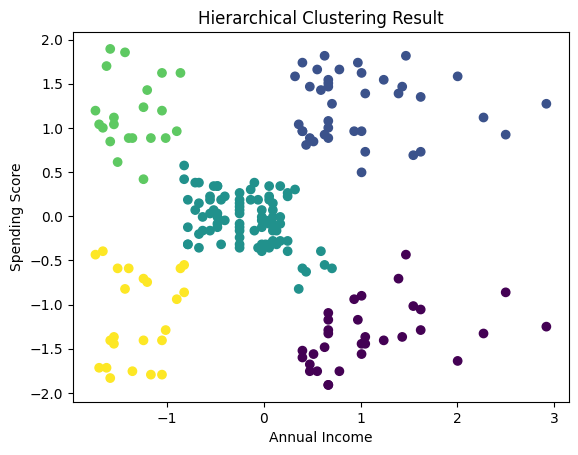

In [35]:
plt.figure()
plt.scatter(X_scaler[:,0],X_scaler[:,1],c = hc_labels)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Hierarchical Clustering Result')

## DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [42]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
db_labels = dbscan.fit_predict(X_scaler)

In [43]:
df['DBSCAN_Cluster'] = db_labels

In [44]:
print('Unique DBSCAN clusters:',set(db_labels))

Unique DBSCAN clusters: {np.int64(0), np.int64(1), np.int64(-1)}


Text(0.5, 1.0, 'DBSCAN Clustering Result')

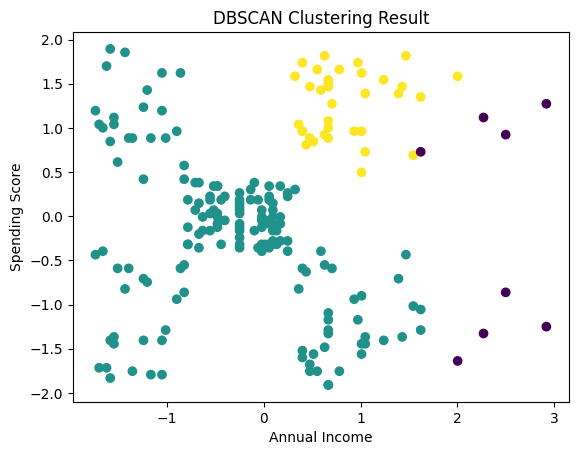

In [45]:
plt.figure()
plt.scatter(X_scaler[:,0],X_scaler[:,1],c= db_labels)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN Clustering Result')

| Algorithm     | Strengths                                      | Weaknesses                                                  | When to Use                                      |
|---------------|-----------------------------------------------|-------------------------------------------------------------|--------------------------------------------------|
| K-Means       | Fast, simple, scalable                         | Needs k, sensitive to scale, assumes spherical clusters     | When clusters are compact and you know approx. k |
| Hierarchical  | No need to pre-train model, shows structure    | Slow for large data, must choose cut level                  | When you want to explore data structure          |
| DBSCAN        | Finds noise, no need to set k, arbitrary shapes| Sensitive to eps & min_samples, varying densities           | When data has noise or irregular shapes          |


### The results differ because each algorithm uses a different clustering logic. K-Means groups points based on distance to centroids and assumes spherical clusters. Hierarchical clustering builds clusters step by step based on distances between points or clusters, which can produce different groupings depending on linkage. DBSCAN groups points based on density and can label some points as noise, which is why it may produce fewer clusters or mark outliers instead of forcing every point into a cluster.

## K-Means Clusters (k = 5)

### Cluster 0: High Income, High Spending


### Profile:
High annual income

High spending score


### Persona:
  “Premium Loyal Customers” – Affluent customers who spend frequently and buy premium products.

### Business Action:
  Offer loyalty programs, exclusive previews, VIP discounts.

### Risk / Limitation:

 These customers may already be loyal to competitors; heavy discounts can reduce profit margins.

### Risk / Limitation:

These customers may already be loyal to competitors; heavy discounts can reduce profit margins.

### Profile:

High income

Low spending score

### Persona:
  “Careful Premium Buyers” – Have money but spend selectively.

### Business Action:

Target with personalized recommendations and premium trials.

### Risk / Limitation:

They may be brand-loyal or uninterested; marketing campaigns may have low conversion.

### Cluster 2: Low Income, High Spending

### Profile:

Low income

High spending score

### Persona:
  “Impulse Shoppers” – Spend a lot relative to their income.

### Business Action:

Promote limited-time offers and trendy products.

### Risk / Limitation:

Risk of customer churn and credit/payment issues if overspending is unsustainable.

### Cluster 3: Low Income, Low Spending

Profile:

Low income

Low spending score

### Persona:
  “Budget-Conscious Customers” – Very price-sensitive and careful spenders.

### Business Action:

Focus on discounts, value packs, and budget products.

### Risk / Limitation:

Low profit margin from this group; high marketing cost may not be worth it.

### Cluster 4: Medium Income, Medium Spending

### Profile:

 (medium) income

 (medium) spending score

### Persona:
  “Average Shoppers” – Balanced customers with normal spending habits.

### Business Action:

Use general promotions, cross-selling, and seasonal offers.

### Risk / Limitation:

This group is broad and not very specific; targeting may be less precise.

## Hierarchical Clustering

### Observation:

Produces similar but sometimes slightly merged or split groups compared to K-Means.

### How to interpret:

Hierarchical clustering reveals the nested structure of customers. Some clusters that are separate in K-Means may merge here, indicating they are not very different in terms of distance. This helps understand which customer segments are closely related.

### How to interpret:

Hierarchical clustering reveals the nested structure of customers. Some clusters that are separate in K-Means may merge here, indicating they are not very different in terms of distance. This helps understand which customer segments are closely related.



## DBSCAN Clustering

### Observation:

DBSCAN may label some customers as -1 (noise/outliers)

Finds dense groups and ignores sparse points.

### Cluster Interpretation:

Persona for Noise Points:
  “Outlier Customers” – Very unusual spending or income behavior.

### Business Action:

Analyze these customers separately for fraud detection, special high-value clients, or unusual behavior patterns.

### Risk / Limitation:

DBSCAN is sensitive to eps and min_samples. Bad parameter choice can label too many points as noise or merge clusters incorrectly.

### 